0 10 83.0998334156
1 50 106.230260182
2 100 109.737328544
3 500 105.253586369
4 1000 91.2261427495
5 5000 101.578102628


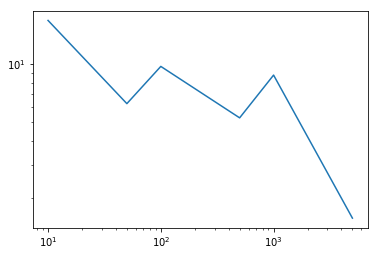

[ 16.90016658   6.23026018   9.73732854   5.25358637   8.77385725
   1.57810263]


In [39]:
"""Lab 2 Task 2
This module contains functions for simulating Brownian motion
and analyzing the results
"""
import numpy as np
import matplotlib.pyplot as plt


def brown1(Nt,M,dt=1):
    """Run M Brownian motion simulations each consisting of Nt time steps
    with time step = dt
    Returns: X: the M trajectories; Xm: the mean across these M samples; Xv:
    the variance across these M samples
    """
    from numpy.random import randn

    #Initialize variable
    X = np.zeros((M,Nt+1))

    #1D Brownian motion: X_j+1 = X_j + sqrt(dt)*N(0,1)
    for i in range(M):
        for j in range(Nt):
            X[i,j+1] = X[i,j] + np.sqrt(dt)*randn(1)

    Xm = np.mean(X,axis=0)
    Xv = np.var(X,axis=0)
    return X,Xm,Xv


def analyze(display=False):
    """Complete this function to analyze simulation error
    """
    Mvalues = [10,50,100,500,1000,5000]
    Nt=100
    Xvarray = np.zeros(len(Mvalues))
    for i,M in enumerate(Mvalues):
        X,Xm,Xv = brown1(Nt, M)
        Xvarray[i] = Xv[-1]
        print(i,M,Xvarray[i])
        
        errorv = abs(Xvarray - Nt)
    if display:   
        plt.figure()
        plt.loglog(Mvalues, errorv)
        plt.show()

   
    return Mvalues,Xvarray,errorv
        
        
        
    
display = False

X,Xm,Xv = brown1(100, 200)

if display:
    print(X.shape)
    print(Xm.shape)
    print(Xv.shape)

    plt.figure()
    plt.plot(X[::40,:].T)
    plt.plot(Xm,'k--')
    plt.plot(Xv,'r-.')
    plt.show()

Mvalues, Xvarray, errorv = analyze(display=True)


